Dataset Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

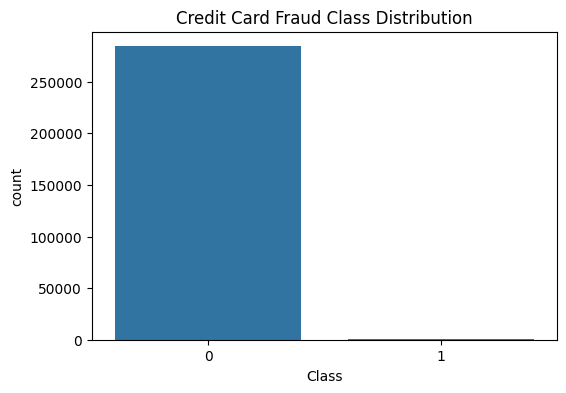

Training Random Forest on Credit Card Data...
--- Credit Card Fraud Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.89      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC: 0.8023


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Load Data
df = pd.read_csv('../data/raw/creditcard.csv')

print(f"Dataset Shape: {df.shape}")
print(df.head())

# 2. Basic EDA
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Credit Card Fraud Class Distribution")
plt.show()

# 3. Preprocessing (Scaling)
# V1-V28 are already PCA transformed. We only need to scale Amount and Time.
# We use RobustScaler because Fraud data usually has extreme outliers.
X = df.drop('Class', axis=1)
y = df['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Modeling (Reusing our winning logic from the previous task)
# We don't need OneHotEncoder here because all features are numeric.
pipeline = ImbPipeline(steps=[
    ('scaler', RobustScaler()), # Scales Amount and Time
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# 5. Train
print("Training Random Forest on Credit Card Data...")
pipeline.fit(X_train, y_train)

# 6. Evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("--- Credit Card Fraud Results ---")
print(classification_report(y_test, y_pred))
print(f"AUPRC: {average_precision_score(y_test, y_prob):.4f}")